# Machine learning techniques for diagnosis of malignant pleural mesothelioma

MPM is a highly aggressive tumor of the serous membranes, which in humans results from exposure to **asbestos** and **asbestiform fibers**. It is a fatal cancer and a malignancy that is resistant to the common tumor directed therapies.

Overall: 
* around half of people diagnosed with mesothelioma will live at least a year after the diagnosis
* around 10% of people with mesothelioma will live at least 5 years after diagnosis

The symptoms of mesothelioma develop usually gradually over time and don't appear until several decades (typically 20 years) after exposure to asbestos ! For mesothelioma in the lining of the lungs, they include :
* chest pain
* shortness of breath
* fatigue
* fever and sweating
* couch
* loss of appetite and unexplained weight loss
* swollen fingertips

As for mesothelioma in the lining of the tummy, they include :
* swelling or tummy pain
* feeling sick
* loss of appetite and unexplained weight loss
* diarrhoea or consitupation

Diagnostics of mesothelioma:
* X-ray of chest or tummy
* CT scan
* fluid drainage
* thoracoscopy or laparoscopy

## Findings in the studied paper 

The paper compares the results of the multilayer neural network (MLNN) structure and Artificial Immune Systems (AIS) on MPM diagnosis. The dataset used comes from a faculty of medecine's database using patient's hospital reports. This dataset includes 324 patients suffering from variety of MPM disease. Each of them have 34 features and diagnostic tests of each patient were recorded by an attending physician.

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mca import MCA # pip install --user mca
# doc: https://github.com/esafak/mca/blob/master/docs/usage.rst

# configuration bibliotheque pour les graphiques
%matplotlib inline 

os.getcwd()

'/Users/romanelgff/Documents/Master/M2/S1/R1/ML/ml-mesothelioma'

In [27]:
df = pd.read_excel("mesothelioma_dataset.xlsx")
df = df.drop(columns = ["diag_method"]) # variable correlee avec la variable explicative donc a enlever (d'apres Valérie)
df.head()

,age,gender,city,asbestos_exp,MM_type,asbestos_exp_dur,keep_side,cytology,symptoms_dur,dyspnoea,...,pleural_dehydrogenise,pleural_protein,pleural_albumin,pleural_glucose,dead,pleural_effusion,pleural_tomography,pleuralPh,CRP,diagnosis
0,47.0,1,0,1,0.0,20.0,0,1,24.0,1,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,0,0,1.0,1,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,1,0,1.0,0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,0,0,3.0,0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1.5,1,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [28]:
# dimensions
df.shape 

(324, 34)

In [29]:
# nombre total d'éléments
df.size

11016

In [30]:
# noms des colonnes
df.columns

Index(['age', 'gender', 'city', 'asbestos_exp', 'MM_type', 'asbestos_exp_dur',
       'keep_side', 'cytology', 'symptoms_dur', 'dyspnoea', 'chest_ache',
       'weakness', 'cigarette', 'perf_status', 'white_blood', 'WBC', 'HGB',
       'PLT', 'sedimentation', 'LDH', 'ALP', 'total_protein', 'albumin',
       'glucose', 'pleural_dehydrogenise', 'pleural_protein',
       'pleural_albumin', 'pleural_glucose', 'dead', 'pleural_effusion',
       'pleural_tomography', 'pleuralPh', 'CRP', 'diagnosis'],
      dtype='object')

In [31]:
# types des colonnes
df.dtypes

age                      float64
gender                     int64
city                       int64
asbestos_exp               int64
MM_type                  float64
asbestos_exp_dur         float64
keep_side                  int64
cytology                   int64
symptoms_dur             float64
dyspnoea                   int64
chest_ache                 int64
weakness                   int64
cigarette                  int64
perf_status                int64
white_blood              float64
WBC                        int64
HGB                        int64
PLT                      float64
sedimentation            float64
LDH                      float64
ALP                      float64
total_protein            float64
albumin                  float64
glucose                  float64
pleural_dehydrogenise    float64
pleural_protein          float64
pleural_albumin          float64
pleural_glucose          float64
dead                       int64
pleural_effusion         float64
pleural_to

* **age**: âge de l'individu 
* **gender**: genre 
* **city**: où habite le patient (plus ou moins proche de la ville)
* **asbestos exposure**: exposition à l'amiante, un silicate fibreux d’origine naturelle
* **type of MM**: type de mésothéliomes malins (trois types)
* **duration of asbetos exposure**: durée d'exposition à l'amiante
* **diagnosis method**: méthode/procédé de diagnostic (0 ou 1?)
* **keep side**: ??? garder de côté le patient? => d'après un autre papier c'est lung side !
* **cytology**: dépistage par cytologie (= étude des cellules isolées)
* **duration of symptoms**: durée des symptômes
* **dyspnoea**: présence ou non de dyspnée (souffle court)
* **ache on chest**: présence ou non d'une douleur à la poitrine 
* **weakness**: faiblesse (ou non)
* **habit of cigarette**: fumeur (ou non)
* **performance status**: statut de performance??
* **White Blood cell count (WBC)**: quantité de globule blanc
* **haemoglobin (HGB)**: 0 ou 1 = anémie ou non??
* **platelet count (PLT)**: nombre de plaquettes (thrombocytes) (low platelet concentration is called thrombocytopenia, and is due to either decreased production or increased destruction. Elevated platelet concentration is called thrombocytosis, and is either congenital, reactive (to cytokines), or due to unregulated production)
* **sedimentation**:  sedimentation rate = blood test that checks for inflammation in your body (measures how fast red blood cells fall to the bottom of a tube. Inflammation creates proteins that make red blood cells fall more quickly)
* **blood lactic dehydrogenise (LDH)**: taux de LDH ou Lactate déshydrogénase (type de protéine aussi appelé enzyme), quand des tissus sont endommagés ou malades, ils relâchent des isoenzymes de LDH dans le sang => le type de LDH rejetté dépend du tissu endommagé
* **alkaline phosphatise (ALP)**: enzyme présente dans le sang, si le taux présent est élevé => problème éventuel = foie, hépatite, obstruction des voies biliaires, cirrhose ou problèmes au niveau des os
* **total protein**: quantité totale de protéine (albumin+globulin) dans le sang (normal values = 6.0 to 8.3 grams per deciliter)
* **albumin**:
* **glucose**:
* **pleural lactic dehydrogenise**:
* **pleural protein**:
* **pleural albumin**:
* **pleural glucose**:
* **dead or not**:
* **pleural effusion**:
* **pleural thickness on tomography**:
* **pleural level of acidity (pH)**
* **C-reactive protein (CRP)**:

In [32]:
# conversion en var catégorielles en prenant soin de convertir en int avant (car certaines var sont de type float)
df["gender"] = pd.Categorical(df["gender"].astype('int'), ordered=False)
df["city"] = pd.Categorical(df["city"].astype('int'), ordered=False)
df["asbestos_exp"] = pd.Categorical(df["asbestos_exp"].astype('int'), ordered=False)
df["MM_type"] = pd.Categorical(df["MM_type"].astype('int'), ordered=False)
df["keep_side"] = pd.Categorical(df["keep_side"].astype('int'), ordered=False)
df["cytology"] = pd.Categorical(df["cytology"].astype('int'), ordered=False)
df["dyspnoea"] = pd.Categorical(df["dyspnoea"].astype('int'), ordered=False)
df["chest_ache"] = pd.Categorical(df["chest_ache"].astype('int'), ordered=False)
df["weakness"] = pd.Categorical(df["weakness"].astype('int'), ordered=False)
df["cigarette"] = pd.Categorical(df["cigarette"].astype('int'), ordered=False)
df["perf_status"] = pd.Categorical(df["perf_status"].astype('int'), ordered=False)
df["HGB"] = pd.Categorical(df["HGB"].astype('int'), ordered=False)
df["dead"] = pd.Categorical(df["dead"].astype('int'), ordered=False)
df["pleural_tomography"] = pd.Categorical(df["pleural_tomography"].astype('int'), ordered=False)
df["pleural_effusion"] = pd.Categorical(df["pleural_effusion"].astype('int'), ordered=False)
df["pleuralPh"] = pd.Categorical(df["pleuralPh"].astype('int'), ordered=False)
df["diagnosis"] = pd.Categorical(df["diagnosis"].astype('int'), ordered=False)

In [33]:
pd.crosstab(df["diagnosis"], df["dead"]) # + de healthy (diagnosis=1) qui meurent que de not healthy, strange

dead,0,1
diagnosis,,
1,14,214
2,4,92


In [34]:
df["MM_type"].unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [35]:
df["pleuralPh"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [11]:
df["keep_side"].unique() # ??? qu'est-ce?

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [12]:
df["cytology"].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [106]:
df["gender"].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [108]:
df["cigarette"].unique()

[2, 3, 0, 1]
Categories (4, int64): [2, 3, 0, 1]

In [109]:
df["city"].unique()

[0, 1, 3, 4, 5, 2, 6, 7, 8]
Categories (9, int64): [0, 1, 3, 4, ..., 2, 6, 7, 8]

In [36]:
# mis en place indicatrices au cas où, pour que la fonction MCA repère bien les variables catégorielles
dc = pd.DataFrame(pd.get_dummies(df.drop('diagnosis', axis=1)))
dc.head()

,age,asbestos_exp_dur,symptoms_dur,white_blood,WBC,PLT,sedimentation,LDH,ALP,total_protein,...,HGB_0,HGB_1,dead_0,dead_1,pleural_effusion_0,pleural_effusion_1,pleural_tomography_0,pleural_tomography_1,pleuralPh_0,pleuralPh_1
0,47.0,20.0,24.0,8050.0,9,274.0,60.0,258.0,65.0,7.0,...,0,1,0,1,1,0,1,0,1,0
1,55.0,45.0,1.0,11200.0,7,615.0,86.0,531.0,97.0,5.4,...,1,0,0,1,0,1,0,1,0,1
2,29.0,23.0,1.0,5300.0,12,189.0,30.0,203.0,72.0,7.0,...,0,1,0,1,1,0,1,0,1,0
3,39.0,10.0,3.0,7910.0,14,462.0,28.0,197.0,50.0,8.0,...,0,1,0,1,0,1,1,0,1,0
4,47.0,10.0,1.5,9120.0,4,530.0,71.0,181.0,60.0,6.2,...,1,0,0,1,0,1,1,0,1,0


## Stat descriptives

### Matrices des corrélations

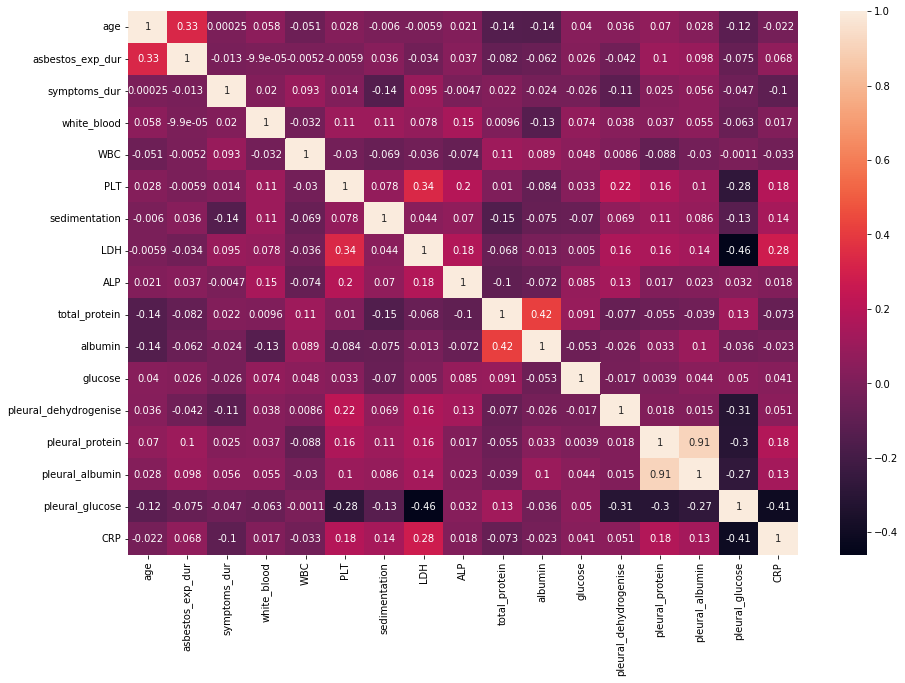

In [37]:
import seaborn as sns

corrMatrix = df.select_dtypes(include='number').corr()

plt.rcParams['figure.figsize'] = [15, 10]
sns.heatmap(corrMatrix, annot=True)
plt.show()

Aucune variable quanti n'est corrélée fortement avec une autre = bonne chose.

### V de Cramer

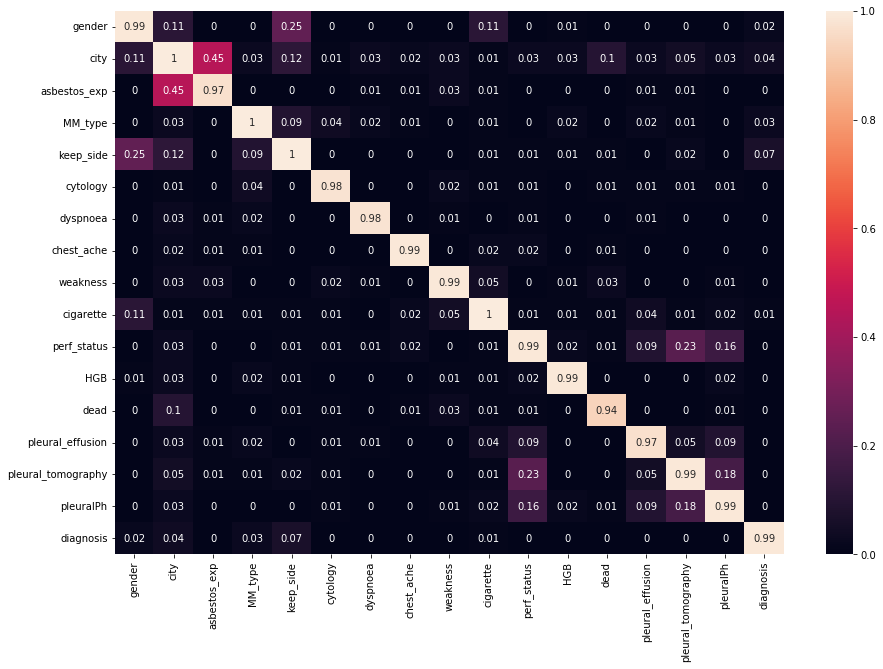

In [38]:
# corrMatrixD = df.select_dtypes(exclude='number').astype('int').apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) # use of pd.factorize
# au dessus fait differement en calculant un semblant de correlation (avec Pearson), le code vient de: https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas

from scipy.stats import chi2_contingency
import numpy as np

# def fonction calculant le V de Cramer
def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1,var2, rownames = None, colnames = None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

# selection uniquement des var de type categorielle
dfCat = df.select_dtypes(exclude='number')
for var1 in dfCat:
  col = []
  for var2 in dfCat :
    cramers = cramers_V(dfCat[var1], dfCat[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corrMatrixD = pd.DataFrame(cramers_results, columns = dfCat.columns, index = dfCat.columns)

plt.rcParams['figure.figsize'] = [15, 10]
sns.heatmap(corrMatrixD, annot=True)
plt.show()

Aucune variable quali n'est corrélée fortement avec une autre = bonne chose. On remarque tout de même que l'exposition à l'amiante est modérément lié avec le fait de vivre en ville.

In [65]:
#corrMatrixO = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
#plt.rcParams['figure.figsize'] = [25, 20]
#sns.heatmap(corrMatrixO, annot=True)
#plt.show()

### V de Cramer entre Y et les variables numériques

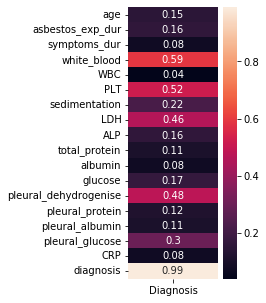

In [39]:
# creation d'une table avec les var numeriques et diagnosis
dfYnum = pd.concat([df.select_dtypes(include='number'), df["diagnosis"]], axis = 1)
rows = []

for var in dfYnum:
  col = []
  cramers = cramers_V(dfYnum["diagnosis"], dfYnum[var]) # Cramer's V test
  col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corrMatrixYnum = pd.DataFrame(cramers_results, columns=["Diagnosis"], index=dfYnum.columns)

plt.rcParams['figure.figsize'] = [2, 5]
sns.heatmap(corrMatrixYnum, annot=True)
plt.show()

Variables très peus corrélées avec la variable cible (< 0.2) = Durée d'exposition à l'amiante, l'âge, la durée des symptômes, WBC, ALP, albumin, total_protein, glucose, pleural portein, pleural albumin et CRP. A retirer donc.

In [53]:
df_mod = df.drop(["age","asbestos_exp_dur", "WBC", "ALP", "albumin", "total_protein", "glucose", "pleural_protein", "pleural_albumin", "CRP", "symptoms_dur"], axis = 1)
df_mod.head()

,gender,city,asbestos_exp,MM_type,keep_side,cytology,dyspnoea,chest_ache,weakness,cigarette,...,PLT,sedimentation,LDH,pleural_dehydrogenise,pleural_glucose,dead,pleural_effusion,pleural_tomography,pleuralPh,diagnosis
0,1,0,1,0,0,1,1,1,0,2,...,274.0,60.0,258.0,289.0,79.0,1,0,0,0,1
1,1,0,1,0,0,0,1,1,1,3,...,615.0,86.0,531.0,7541.0,6.0,1,1,1,1,1
2,1,1,1,0,1,0,0,0,0,2,...,189.0,30.0,203.0,480.0,90.0,1,0,0,0,2
3,1,0,1,0,0,0,0,1,1,0,...,462.0,28.0,197.0,459.0,45.0,1,1,0,0,1
4,1,0,1,0,1,1,1,1,0,3,...,530.0,71.0,181.0,213.0,53.0,1,1,0,0,1


### Réprésentations graphiques

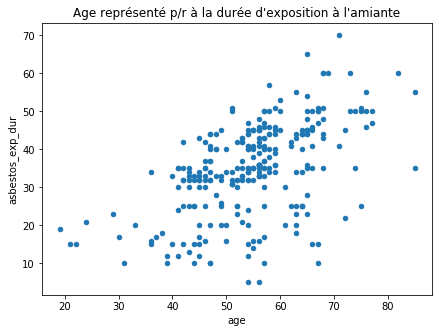

In [41]:
var = df[df["asbestos_exp"] == 1]

plt.rcParams['figure.figsize'] = [7, 5]
var.plot.scatter(title="Age représenté p/r à la durée d'exposition à l'amiante",
         x="age",
         y="asbestos_exp_dur")

Maybe faire un premier test avec toutes les variables comme il n'y en a pas tant que ça et qu'aucune variable explicative n'est corrélée fortement/n'a de relation forte avec une autre ?

## MCA and PCA analyses

In [42]:
dc = pd.DataFrame(pd.get_dummies(df_mod.drop('diagnosis', axis=1)))
dc.head()

,white_blood,PLT,sedimentation,LDH,pleural_dehydrogenise,pleural_glucose,gender_0,gender_1,city_0,city_1,...,HGB_0,HGB_1,dead_0,dead_1,pleural_effusion_0,pleural_effusion_1,pleural_tomography_0,pleural_tomography_1,pleuralPh_0,pleuralPh_1
0,8050.0,274.0,60.0,258.0,289.0,79.0,0,1,1,0,...,0,1,0,1,1,0,1,0,1,0
1,11200.0,615.0,86.0,531.0,7541.0,6.0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
2,5300.0,189.0,30.0,203.0,480.0,90.0,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
3,7910.0,462.0,28.0,197.0,459.0,45.0,0,1,1,0,...,0,1,0,1,0,1,1,0,1,0
4,9120.0,530.0,71.0,181.0,213.0,53.0,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0


In [43]:
mca_res = MCA(dc, benzecri=False) # disabling benzecri correction 
print(mca_res.L) # eigenvalues of the factors
print(mca_res.inertia, sum(mca_res.L)) # inertia

[0.04773461 0.01641034 0.00673095 0.00258806 0.00089853 0.0001978
 0.00018854 0.00015122 0.00015046 0.00014313 0.0001304  0.00012487
 0.00011258 0.00010909 0.00010685 0.00010317 0.00010163]
0.07696730166325705 0.07598224383365006


In [44]:
data = {'Iλ': pd.Series(mca_res.L)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2.head() # NUL

,Iλ
Factor,
1,0.047735
2,0.016410
3,0.006731
4,0.002588
5,0.000899


In [45]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [51]:
# essayons une ACP...
X = df.select_dtypes(include='number')
scaler = preprocessing.StandardScaler().fit(X) # creation d'un scaler

X_scaled = pd.DataFrame(scaler.transform(X)) # scaling X
y = df["diagnosis"]
X_scaled.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.704904,-0.621441,3.939513,-0.408502,-0.167178,-0.420994,-0.492093,-0.275420,-0.033224,0.502317,-0.159627,-0.192962,-0.428559,-2.503893,-2.272308,1.123760,-1.334180
1,0.023319,0.903452,-0.943190,0.505760,-0.765693,1.079865,0.705305,1.201391,0.880472,-1.428726,-1.106574,-0.427312,13.115167,-1.486454,-1.397032,-1.561005,-0.980617
2,-2.343406,-0.438454,-0.943190,-1.206667,0.730595,-0.795108,-1.873705,-0.572947,0.166647,0.502317,0.313847,-0.505429,-0.071850,-2.503893,-2.272308,1.528314,-0.936422
3,-1.433127,-1.231399,-0.518607,-0.449136,1.329110,0.406459,-1.965813,-0.605404,-0.461519,1.709219,1.892092,-0.505429,-0.111069,0.675604,0.791159,-0.126678,-1.908719
4,-0.704904,-1.231399,-0.837044,-0.097943,-1.663465,0.705750,0.014498,-0.691957,-0.175989,-0.463204,0.787320,-0.765819,-0.570495,-0.214655,-0.138822,0.167542,-2.350672


In [52]:
n_components = 6

#PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

sum(pca.explained_variance_ratio_) # sum of the % of variance explained by earch of the selected components

0.5634605521929321

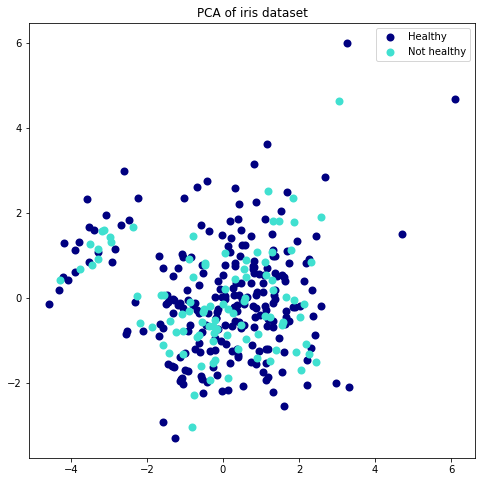

In [54]:
colors = ["navy", "turquoise"]#, "pink"]

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [1, 2], np.array(["Healthy", "Not healthy"])):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        color=color,
        lw=2,
        label=target_name,
    )

plt.title("PCA of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show() # again: not concluant

## Prédiction du diagnostic
(essais, démarche à revoir + le choix des variables)

In [72]:
# modules de modelisation
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
# variables qui vont servir pour la modelisation
print(dc.columns) # pour l'instant on garder les variables sous forme de dummy

Index(['white_blood', 'PLT', 'sedimentation', 'LDH', 'pleural_dehydrogenise',
       'pleural_glucose', 'gender_0', 'gender_1', 'city_0', 'city_1', 'city_2',
       'city_3', 'city_4', 'city_5', 'city_6', 'city_7', 'city_8',
       'asbestos_exp_0', 'asbestos_exp_1', 'MM_type_0', 'MM_type_1',
       'MM_type_2', 'keep_side_0', 'keep_side_1', 'keep_side_2', 'cytology_0',
       'cytology_1', 'dyspnoea_0', 'dyspnoea_1', 'chest_ache_0',
       'chest_ache_1', 'weakness_0', 'weakness_1', 'cigarette_0',
       'cigarette_1', 'cigarette_2', 'cigarette_3', 'perf_status_0',
       'perf_status_1', 'HGB_0', 'HGB_1', 'dead_0', 'dead_1',
       'pleural_effusion_0', 'pleural_effusion_1', 'pleural_tomography_0',
       'pleural_tomography_1', 'pleuralPh_0', 'pleuralPh_1'],
      dtype='object')


In [58]:
# verif NA
print(dc.isnull().sum())

white_blood              0
PLT                      0
sedimentation            0
LDH                      0
pleural_dehydrogenise    0
pleural_glucose          0
gender_0                 0
gender_1                 0
city_0                   0
city_1                   0
city_2                   0
city_3                   0
city_4                   0
city_5                   0
city_6                   0
city_7                   0
city_8                   0
asbestos_exp_0           0
asbestos_exp_1           0
MM_type_0                0
MM_type_1                0
MM_type_2                0
keep_side_0              0
keep_side_1              0
keep_side_2              0
cytology_0               0
cytology_1               0
dyspnoea_0               0
dyspnoea_1               0
chest_ache_0             0
chest_ache_1             0
weakness_0               0
weakness_1               0
cigarette_0              0
cigarette_1              0
cigarette_2              0
cigarette_3              0
p

In [75]:
X = df_mod.drop("diagnosis",axis=1).copy()
y = df_mod["diagnosis"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Régression logistique

In [76]:
X_train.dtypes

gender                   category
city                     category
asbestos_exp             category
MM_type                  category
keep_side                category
cytology                 category
dyspnoea                 category
chest_ache               category
weakness                 category
cigarette                category
perf_status              category
white_blood               float64
HGB                      category
PLT                       float64
sedimentation             float64
LDH                       float64
pleural_dehydrogenise     float64
pleural_glucose           float64
dead                     category
pleural_effusion         category
pleural_tomography       category
pleuralPh                category
dtype: object

In [77]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [78]:
pred_log = logistic.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [79]:
# Use score method to get accuracy of model
score_log = logistic.score(X_test, y_test)
print(score_log)

0.7384615384615385


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [80]:
cm_log = metrics.confusion_matrix(y_test, pred_log)

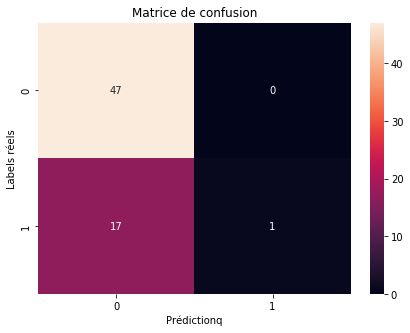

In [81]:
ax = plt.subplot()
sns.heatmap(cm_log,annot=True,fmt="d") 
ax.set_xlabel('Prédictionq'); ax.set_ylabel('Labels réels'); 
ax.set_title('Matrice de confusion'); 
plt.show()

### Random forest

In [82]:
# test avec un random forrest classique
rf = RandomForestClassifier(n_estimators = 100,
                           n_jobs = 10,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)   

In [84]:
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(n_jobs=10, oob_score=True, random_state=42)

#### Evaluation des performances

In [85]:
# modules complementaires
import shap
from sklearn.inspection import permutation_importance

In [86]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train.values, y_train.values), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test.values, y_test.values))) 

R^2 Training Score: 1.00 
OOB Score: 0.71 
R^2 Validation Score: 0.75


In [88]:
rf.feature_importances_

array([0.02735051, 0.06956693, 0.01164852, 0.02507082, 0.06628227,
       0.01840042, 0.01768911, 0.01976891, 0.01499865, 0.03069631,
       0.01418048, 0.09588351, 0.02573279, 0.11602189, 0.09060383,
       0.10813252, 0.10231416, 0.09486178, 0.00562247, 0.0100945 ,
       0.01721364, 0.01786598])

In [92]:
df_meso = df_mod.loc[df_mod['diagnosis'] == 1]

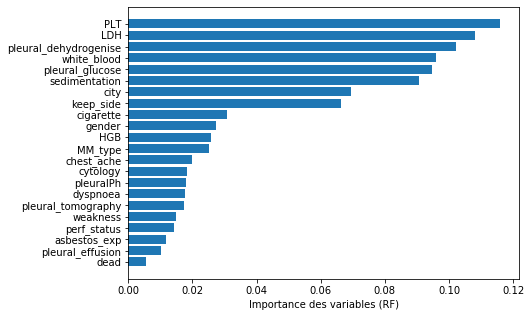

In [93]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_meso.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Importance des variables (RF)")
plt.show()

In [94]:
perm_importance = permutation_importance(rf, X_test.values, y_test.values)

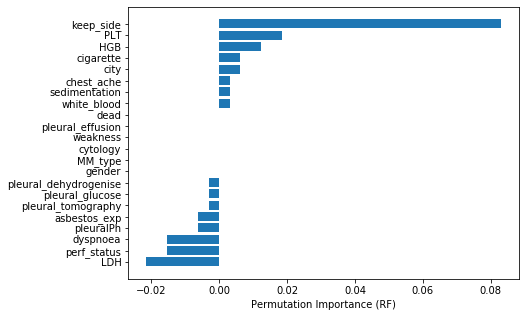

In [95]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df_mod.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance (RF)")
plt.show()

In [96]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test.values)

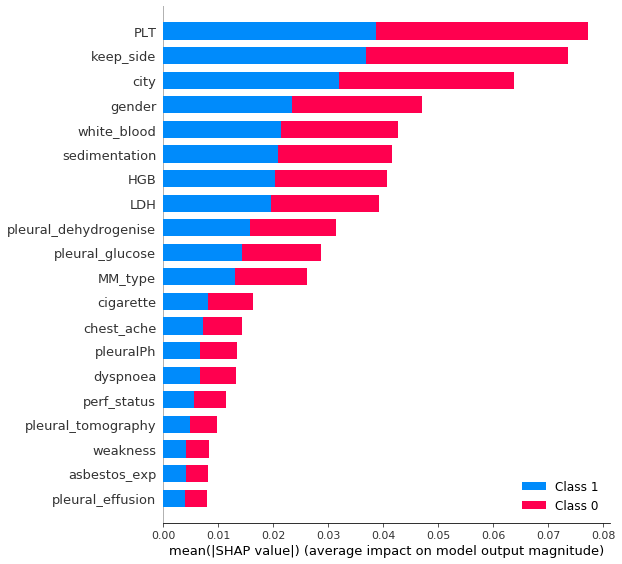

In [97]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

Les variables avec le plus d'influence d'après les 3 critères utilisés ci-dessus sont:

* PLT
* keep_side
* city
* gender
* white_blood
* sedimentation
* HGB
* LDH

In [100]:
# calcul du score
score = rf.score(X_test.values, y_test.values)
print(score)

0.7538461538461538


In [102]:
# predictions
pred = rf.predict(X_test.values)
print(metrics.classification_report(y_test.values, pred))

              precision    recall  f1-score   support

           1       0.76      0.96      0.85        47
           2       0.67      0.22      0.33        18

    accuracy                           0.75        65
   macro avg       0.71      0.59      0.59        65
weighted avg       0.74      0.75      0.71        65



In [103]:
# matrice de confusion
cm = metrics.confusion_matrix(y_test, pred)

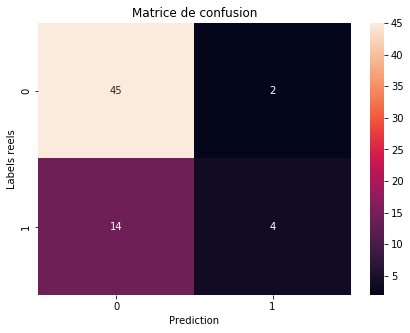

In [104]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction');ax.set_ylabel('Labels reels'); 
ax.set_title('Matrice de confusion'); 
plt.show()